In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import optim, nn

## Notes

Adapted from https://github.com/dynamicslab/databook_python

In [2]:
Xin = np.load('inputs.npy').astype('float32')
Xout = np.load('outputs.npy').astype('float32')

In [3]:
u_val = Xin[:1,...].reshape((-1,3))
v_val = Xout[:1,...].reshape((-1,3))
u = Xin[1:,...].reshape((-1,3))
v = Xout[1:,...].reshape((-1,3))

In [4]:
u_val = torch.from_numpy(u_val)
v_val = torch.from_numpy(v_val)
u = torch.from_numpy(u)
v = torch.from_numpy(v)

In [5]:
u.shape

torch.Size([792000, 3])

In [6]:
N_PER_LAYER = 20

model = nn.Sequential(
    nn.Linear(u.shape[-1], N_PER_LAYER),
    nn.Sigmoid(),
    nn.Linear(N_PER_LAYER, N_PER_LAYER),
    nn.Sigmoid(),
    nn.Linear(N_PER_LAYER,N_PER_LAYER),
    nn.Sigmoid(),
    nn.Linear(N_PER_LAYER, u.shape[-1]),
)

In [7]:
optimizer = optim.Adam(model.parameters(), lr=1e-2)

In [8]:
loss_fn = nn.MSELoss()

In [9]:
from torch.utils.data import DataLoader, TensorDataset

BATCH_SIZE = 2048
N_EPOCHS = 1000

dataset = TensorDataset(u, v)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False)
dataset_size = len(dataloader.dataset)

losses = np.zeros(N_EPOCHS)
for epoch in range(N_EPOCHS):
    for id_batch, (x_batch, y_batch) in enumerate(dataloader):

        y_batch_pred = model(x_batch)
        loss = loss_fn(y_batch_pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss, current = loss.item(), (id_batch + 1)* len(x_batch)
    losses[epoch] = loss
    print(f"Epoch {epoch + 1:06} loss: {loss:>7f}")
    

Epoch 000001 loss: 34.612656
Epoch 000002 loss: 4.225924
Epoch 000003 loss: 1.652520
Epoch 000004 loss: 0.572598
Epoch 000005 loss: 0.289843
Epoch 000006 loss: 0.183640
Epoch 000007 loss: 0.137967
Epoch 000008 loss: 0.112944
Epoch 000009 loss: 0.214451
Epoch 000010 loss: 0.094380
Epoch 000011 loss: 0.059851
Epoch 000012 loss: 0.040922
Epoch 000013 loss: 0.034826
Epoch 000014 loss: 0.026784
Epoch 000015 loss: 0.023435
Epoch 000016 loss: 0.034065
Epoch 000017 loss: 0.130996
Epoch 000018 loss: 0.018780
Epoch 000019 loss: 0.015496
Epoch 000020 loss: 0.016150
Epoch 000021 loss: 0.075513
Epoch 000022 loss: 0.018825
Epoch 000023 loss: 0.029431
Epoch 000024 loss: 0.067381
Epoch 000025 loss: 0.012040
Epoch 000026 loss: 0.019108
Epoch 000027 loss: 0.014846
Epoch 000028 loss: 0.010991
Epoch 000029 loss: 0.007200
Epoch 000030 loss: 0.010183
Epoch 000031 loss: 0.004679
Epoch 000032 loss: 0.023379
Epoch 000033 loss: 0.021602
Epoch 000034 loss: 0.005746
Epoch 000035 loss: 0.005523
Epoch 000036 loss: 

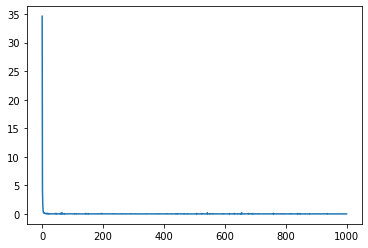

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(losses, label='mse')
pass

### In-sample predictions for all trajectories

In [11]:
n_reps, n_steps, n_dims = Xin.shape

predicted_trajectory = torch.zeros((n_reps, n_steps, n_dims))
predicted_trajectory[:, 0, :] = torch.tensor(Xin[:, 0, :])

for i in range(n_steps-1):
    predicted_trajectory[:, i+1] = model(predicted_trajectory[:, i:(i+1), :].squeeze())

### Visualize predictions

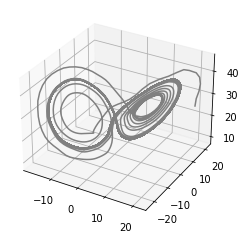

In [19]:
k = np.random.randint(1,100)

x, y, z = predicted_trajectory[k].T.detach().numpy()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'gray')
pass

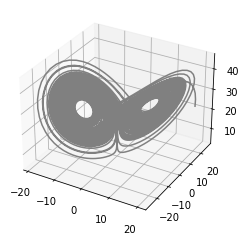

In [20]:
x, y, z = Xin[k,...].T
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'gray')
pass

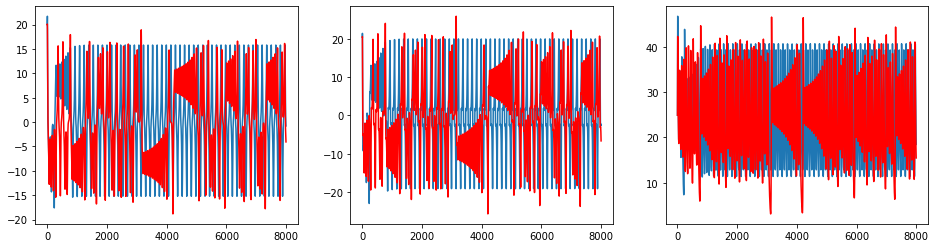

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))

x, y, z = predicted_trajectory[k].T.detach().numpy()

axes[0].plot(x)
axes[0].plot(Xin[k,:,0], c='red')
axes[1].plot(y)
axes[1].plot(Xin[k,:,1], c='red')
axes[2].plot(z)
axes[2].plot(Xin[k,:,2], c='red')
pass

### Out-of-sample test

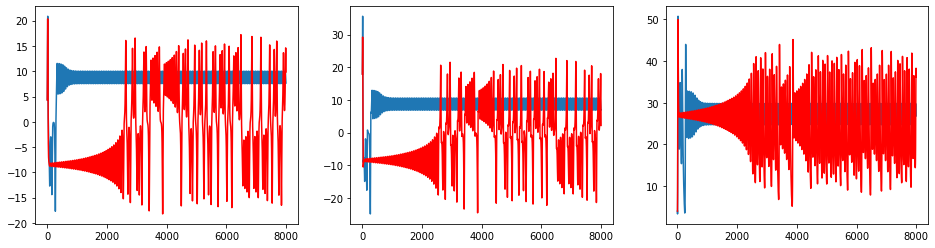

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))

x, y, z = predicted_trajectory[0].T.detach().numpy()

axes[0].plot(x)
axes[0].plot(Xin[0,:,0], c='red')
axes[1].plot(y)
axes[1].plot(Xin[0,:,1], c='red')
axes[2].plot(z)
axes[2].plot(Xin[0,:,2], c='red')
pass